In [11]:
! pip install matplotlib numpy

You should consider upgrading via the 'c:\users\daniel\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, pi, float32


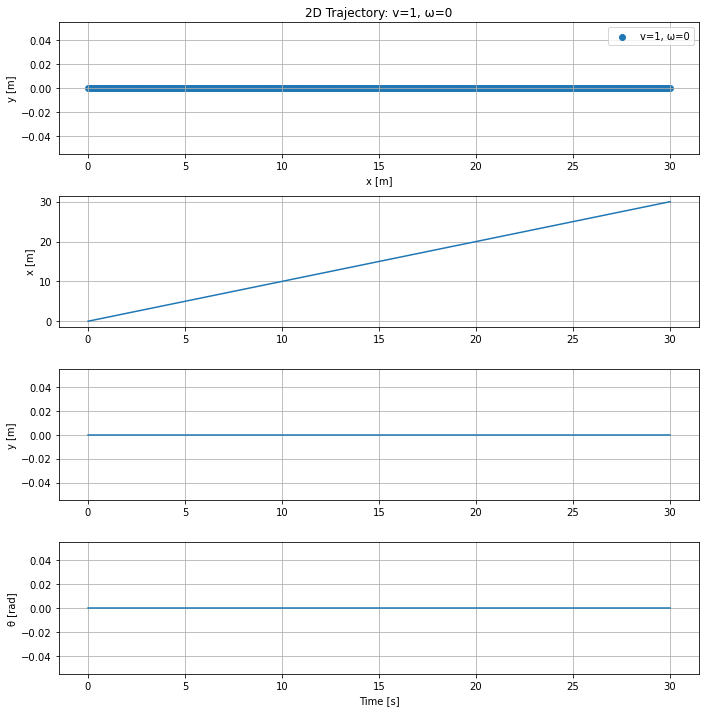

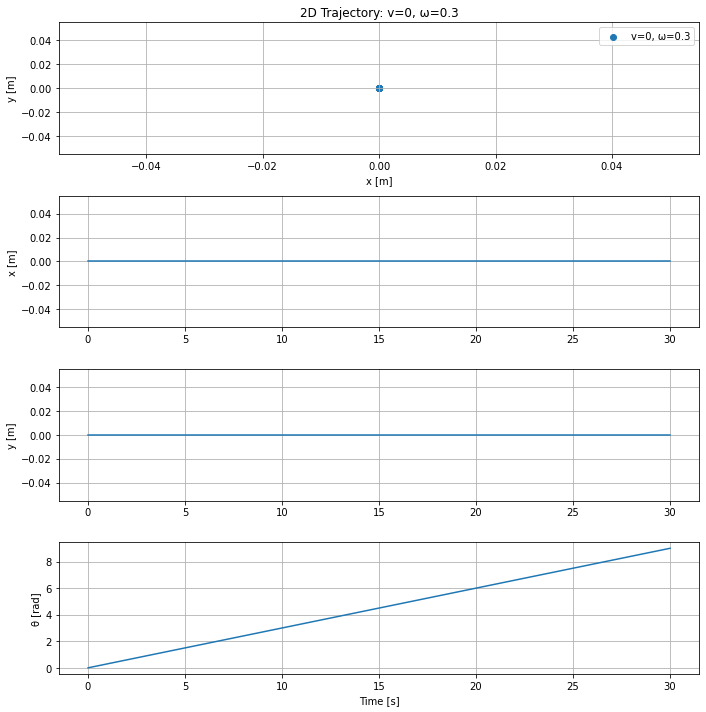

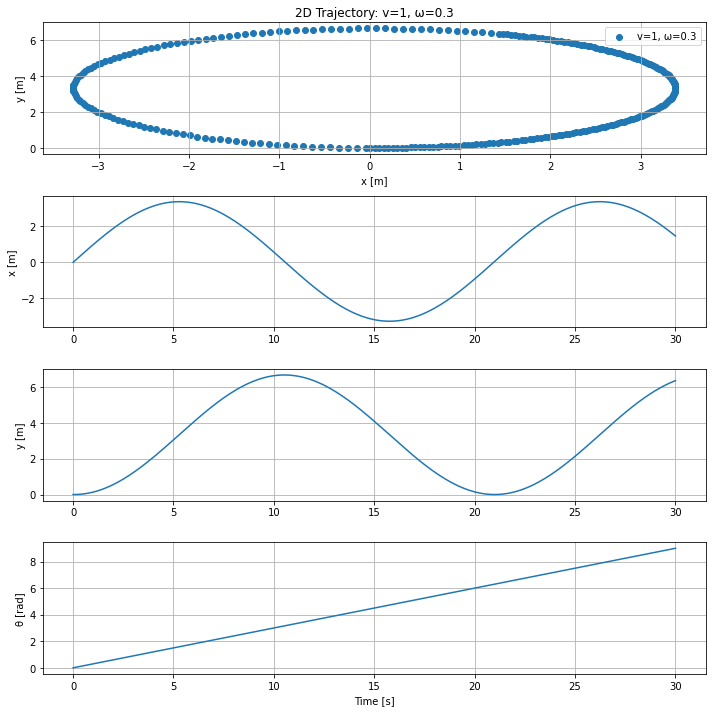

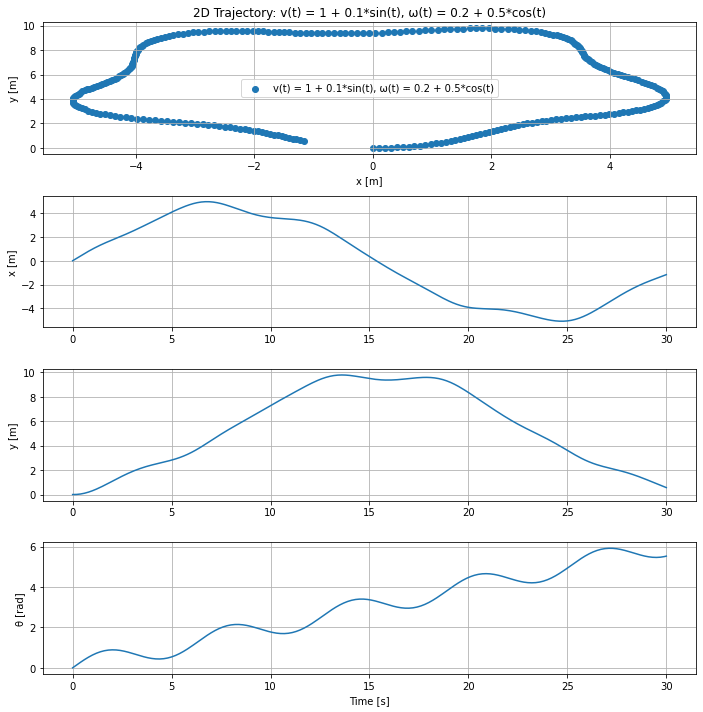

In [13]:
# q3a

def robot_kinematics(state, v, omega, dt):
    x, y, theta = state
    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dthetadt = omega
    
    x_new = x + dxdt * dt
    y_new = y + dydt * dt
    theta_new = theta + dthetadt * dt
    
    return [x_new, y_new, theta_new]

time_span = 30 # seconds
dt = 0.1 # seconds

time_steps = int(time_span / dt)
time_array = np.arange(0, time_span + dt, dt)

# Define velocity profiles
def velocity_profile_1(t):
    return 1, 0  # [v, omega]

def velocity_profile_2(t):
    return 0, 0.3  # [v, omega]

def velocity_profile_3(t):
    return 1, 0.3  # [v, omega]

def velocity_profile_4(t):
    v = 1 + 0.1 * np.sin(t)
    omega = 0.2 + 0.5 * np.cos(t)
    return v, omega

def simulate_trajectory(profile_func, initial_state=[0, 0, 0]):
    # Initialize state [x, y, theta]
    state = initial_state
    
    # Store state values for plotting
    x_vals = [state[0]]
    y_vals = [state[1]]
    theta_vals = [state[2]]
    
    # Run simulation
    for i in range(time_steps):
        t = i * dt
        v, omega = profile_func(t)
        
        state = robot_kinematics(state, v, omega, dt)
        
        x_vals.append(state[0])
        y_vals.append(state[1])
        theta_vals.append(state[2])
    
    return x_vals, y_vals, theta_vals

def plot_trajectory_and_variables(x_vals, y_vals, theta_vals, profile_label):
    plt.figure(figsize=(10, 10))

    # Plot 2D trajectory
    plt.subplot(4, 1, 1)
    plt.scatter(x_vals, y_vals, label=profile_label)
    plt.title(f'2D Trajectory: {profile_label}')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.grid()
    plt.legend()

    # Plot x(t)
    plt.subplot(4, 1, 2)
    plt.plot(time_array, x_vals, label='x(t)')
    plt.ylabel('x [m]')
    plt.grid()

    # Plot y(t)
    plt.subplot(4, 1, 3)
    plt.plot(time_array, y_vals, label='y(t)')
    plt.ylabel('y [m]')
    plt.grid()

    # Plot θ(t)
    plt.subplot(4, 1, 4)
    plt.plot(time_array, theta_vals, label='θ(t)')
    plt.xlabel('Time [s]')
    plt.ylabel('θ [rad]')
    plt.grid()

    plt.tight_layout()
    plt.show()

x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_1)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v=1, ω=0')

x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_2)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v=0, ω=0.3')

x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_3)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v=1, ω=0.3')

x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_4)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v(t) = 1 + 0.1*sin(t), ω(t) = 0.2 + 0.5*cos(t)')


In [14]:
# q3b

r = 0.1  # wheel radius in meters
T = 0.2  # track width in meters

def calculate_wheel_speeds(v, omega, r, T):
    u_r = (v / r) + (T * omega) / (2 * r)
    u_l = (v / r) - (T * omega) / (2 * r)
    return u_r, u_l

velocity_profiles = [
    (1, 0),   # Case 1: v = 1 m/s, omega = 0 rad/s
    (0, 0.3), # Case 2: v = 0 m/s, omega = 0.3 rad/s
    (1, 0.3)  # Case 3: v = 1 m/s, omega = 0.3 rad/s
]

for (v, omega) in velocity_profiles:
    u_r, u_l = calculate_wheel_speeds(v, omega, r, T)
    print(f"v = {v} m/s, omega = {omega} rad/s")
    print(f"  Right wheel speed (u_r): {u_r:.2f} m/s")
    print(f"  Left wheel speed (u_l): {u_l:.2f} m/s")
    print()


v = 1 m/s, omega = 0 rad/s
  Right wheel speed (u_r): 10.00 m/s
  Left wheel speed (u_l): 10.00 m/s

v = 0 m/s, omega = 0.3 rad/s
  Right wheel speed (u_r): 0.30 m/s
  Left wheel speed (u_l): -0.30 m/s

v = 1 m/s, omega = 0.3 rad/s
  Right wheel speed (u_r): 10.30 m/s
  Left wheel speed (u_l): 9.70 m/s



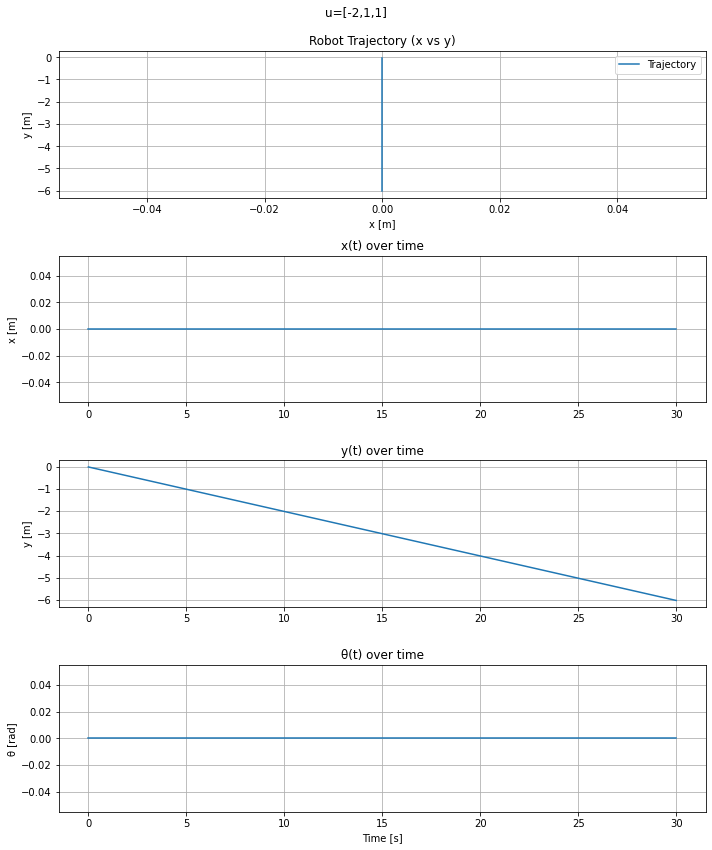

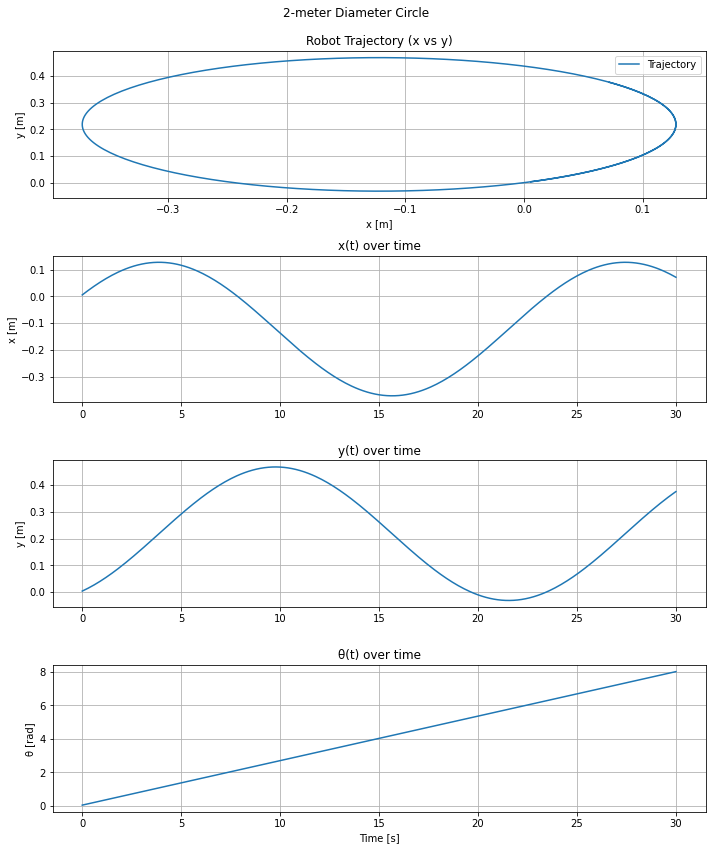

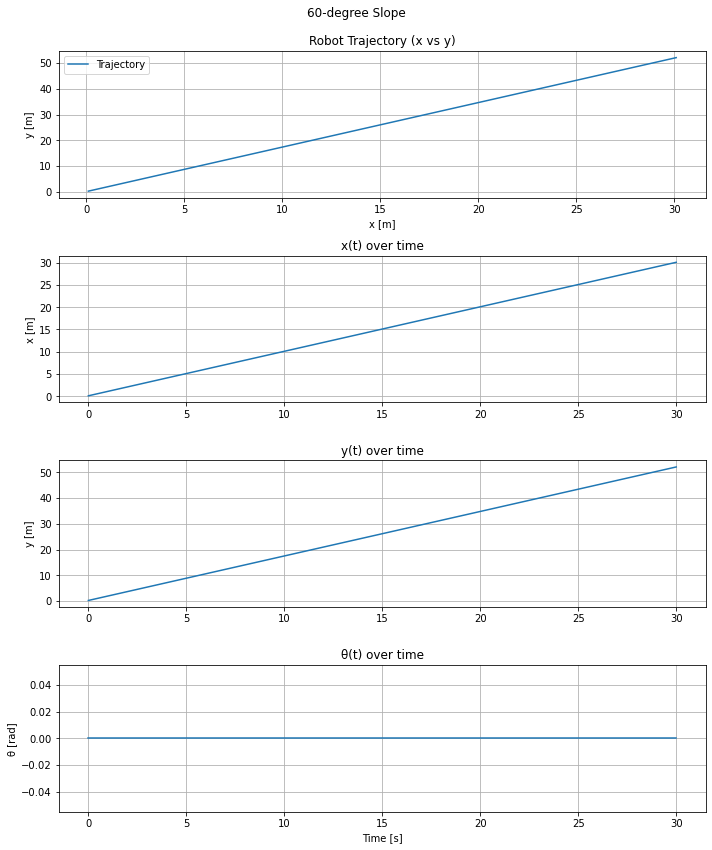

In [15]:
# q4

r = 0.10  # Wheel radius in meters
l = 0.25  # Distance from the center to each wheel (in meters)

dt = 0.1  # Time step (s)
time_span = 30  # Total simulation time (s)

time_array = np.arange(0, time_span + dt, dt)

def vel_to_wheel_speed_matrix(t):
    # u = (1/r) * G(θ) * [vx, vy, ω]
    
    G_matrix = np.array([[cos(t + pi/2), sin(t + pi/2), l*sin(pi/2)], 
                [cos(t+7*pi/6), sin(t+7*pi/6), -l*sin(pi/6)*sin(7*pi/6)-l*cos(pi/6)*cos(7*pi/6)], 
                [cos(t+11*pi/6), sin(t+11*pi/6), -l*sin(pi/6)*sin(11*pi/6)+l*cos(pi/6)*cos(11*pi/6)]], dtype=float32)
    return 1/r * G_matrix

def simulate_robot_motion(u_func):
    # Initialize the state [x, y, theta]
    state = np.array([0, 0, 0], dtype=float32)
    
    x_vals, y_vals, theta_vals = [], [], []

    for t in time_array:
        wheel_speed_to_vel_matrix = np.linalg.inv(vel_to_wheel_speed_matrix(state[2]))
        
        u = u_func(t)
        
        # Calculate the robot's velocities: [vx, vy, omega]
        velocities = wheel_speed_to_vel_matrix @ u
        
        state[0] += (velocities[0] * dt)  # x position
        state[1] += (velocities[1] * dt)  # y position
        state[2] += (velocities[2] * dt)  # θ (orientation)
        
        # Store state history for plotting
        x_vals.append(state[0])
        y_vals.append(state[1])
        theta_vals.append(state[2])
    
    return x_vals, y_vals, theta_vals


# Define wheel speed inputs
def u_func_sim1(t):
    return np.array([[-2.0], [1.0], [1.0]], dtype=float32)

def u_func_sim2(t):
    return np.array([[1.0], [0.0], [1.0]], dtype=float32)

def u_func_sim3(t):
    vx = 1.0  # Linear velocity along the slope direction
    vy = vx * np.tan(np.radians(60))  # y-component to achieve the slope
    omega = 0.0 
    return vel_to_wheel_speed_matrix(0) @ np.array([[vx], [vy], [omega]], dtype=float32)

# Run simulations
x_vals_1, y_vals_1, theta_vals_1 = simulate_robot_motion(u_func_sim1)
x_vals_2, y_vals_2, theta_vals_2 = simulate_robot_motion(u_func_sim2)
x_vals_3, y_vals_3, theta_vals_3 = simulate_robot_motion(u_func_sim3)

def plot_simulation(sim_num, x_vals, y_vals, theta_vals, title):
    plt.figure(figsize=(10, 12))
    plt.suptitle(f'{title}', y=0.98)

    # Trajectory Plot
    plt.subplot(4, 1, 1)
    plt.plot(x_vals, y_vals, label="Trajectory")
    plt.title("Robot Trajectory (x vs y)")
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.grid()
    plt.legend()

    # x(t) Plot
    plt.subplot(4, 1, 2)
    plt.plot(time_array, x_vals, label="x(t)")
    plt.title("x(t) over time")
    plt.ylabel("x [m]")
    plt.grid()

    # y(t) Plot
    plt.subplot(4, 1, 3)
    plt.plot(time_array, y_vals, label="y(t)")
    plt.title("y(t) over time")
    plt.ylabel("y [m]")
    plt.grid()

    # θ(t) Plot
    plt.subplot(4, 1, 4)
    plt.plot(time_array, theta_vals, label="θ(t)")
    plt.title("θ(t) over time")
    plt.ylabel("θ [rad]")
    plt.xlabel("Time [s]")
    plt.grid()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot all simulations
plot_simulation(1, x_vals_1, y_vals_1, theta_vals_1, 'u=[-2,1,1]')
plot_simulation(2, x_vals_2, y_vals_2, theta_vals_2, '2-meter Diameter Circle')
plot_simulation(3, x_vals_3, y_vals_3, theta_vals_3, '60-degree Slope')
